In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
file_path = '/content/StudentsPerformance.csv'
data = pd.read_csv(file_path)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['race/ethnicity'] = label_encoder.fit_transform(data['race/ethnicity'])
data['parental level of education'] = label_encoder.fit_transform(data['parental level of education'])
data['lunch'] = label_encoder.fit_transform(data['lunch'])
data['test preparation course'] = label_encoder.fit_transform(data['test preparation course'])


# Display the first few rows to verify changes
print(data.head())


   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  
0                        1          72             72             74  
1                        0          69             90             88  
2                        1          90             95             93  
3                        1          47             57             44  
4                        1          76             78             75  


In [ ]:
# Check correlation between features
correlation_matrix = data.corr()
print(correlation_matrix)

# Optional: Create additional features if necessary
# For example, calculate the average score of students
data['average_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)
print(data.head())


                               gender  race/ethnicity  \
gender                       1.000000       -0.001502   
race/ethnicity              -0.001502        1.000000   
parental level of education  0.001913       -0.031946   
lunch                        0.021372        0.046563   
test preparation course     -0.006028       -0.017508   
math score                   0.167982        0.216415   
reading score               -0.244313        0.145253   
writing score               -0.301225        0.165691   

                             parental level of education     lunch  \
gender                                          0.001913  0.021372   
race/ethnicity                                 -0.031946  0.046563   
parental level of education                     1.000000  0.006320   
lunch                                           0.006320  1.000000   
test preparation course                        -0.023968  0.017044   
math score                                     -0.068279  0.350877

In [ ]:
# Define features and target variable
X = data.drop(['average_score'], axis=1)
y = data['average_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 1.28
R-squared: 0.99


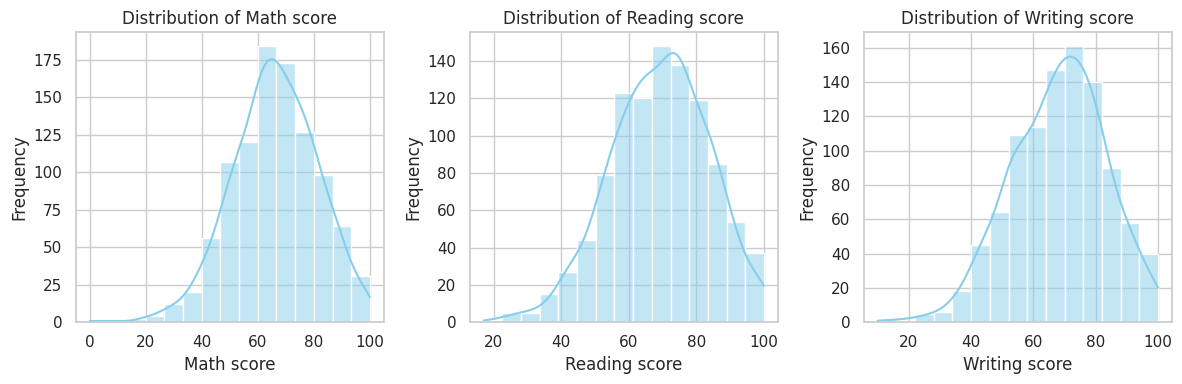

In [ ]:
# Set the style of the visualizations
sns.set(style="whitegrid")

# Plot the distribution of math, reading, and writing scores
plt.figure(figsize=(12, 4))
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[subject], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribution of {subject.capitalize()}')
    plt.xlabel(subject.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


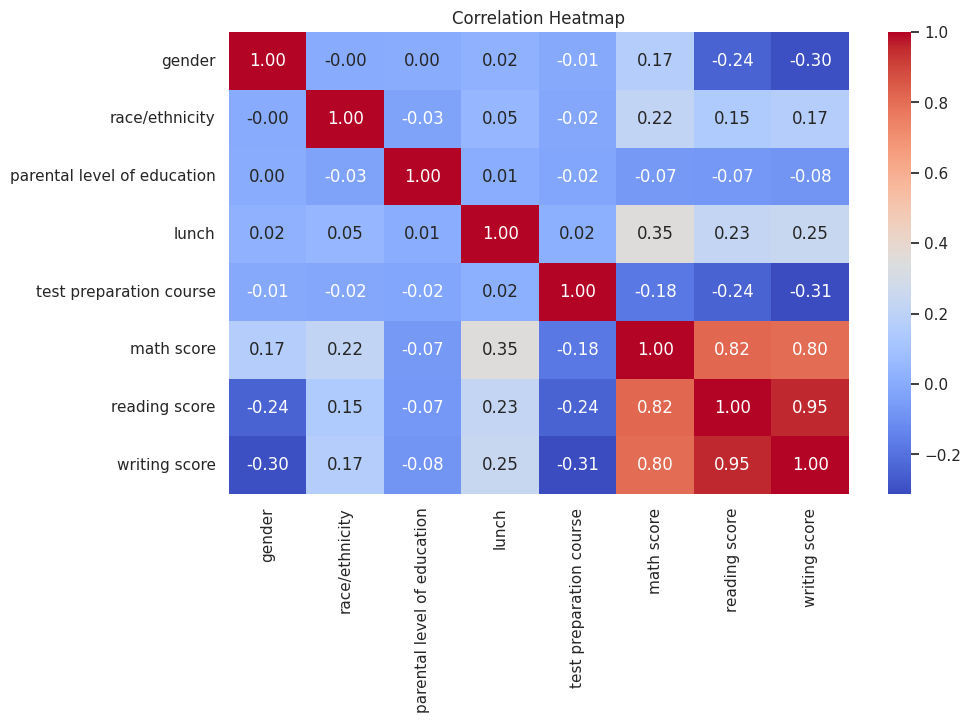

In [ ]:
# Plot a heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-15-f6baf07a9fed>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=features[indices], palette='viridis')


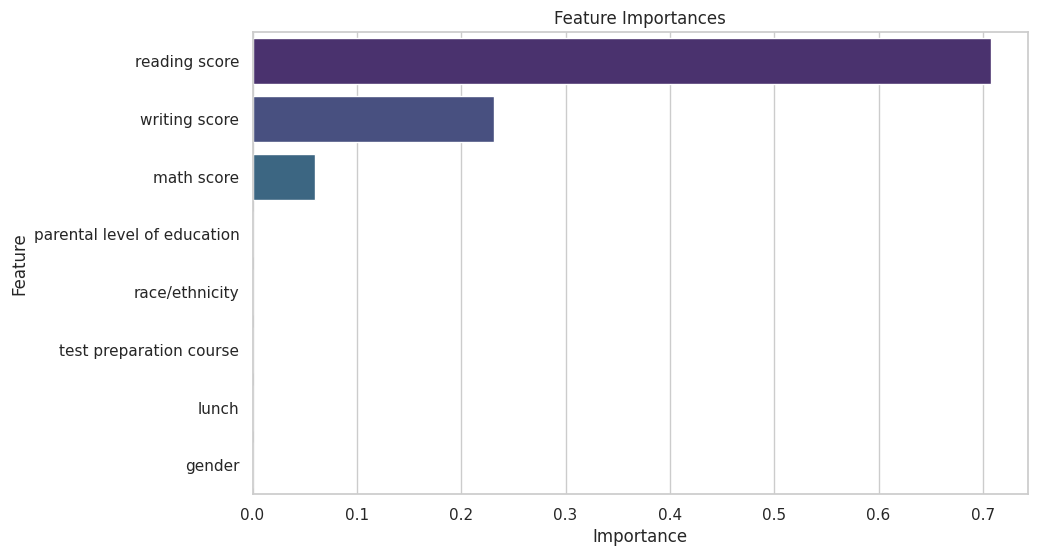

In [ ]:
# Get feature importances from the model
feature_importances = model.feature_importances_
features = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=features[indices], palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


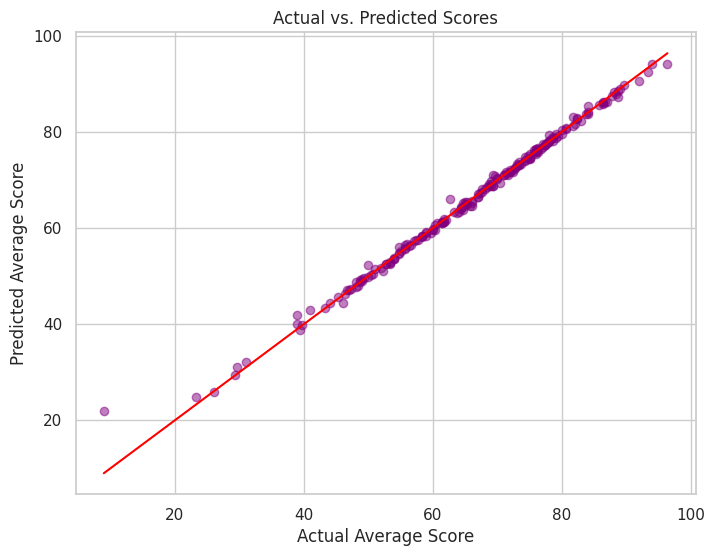

In [ ]:
# Plot actual vs. predicted scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.title('Actual vs. Predicted Scores')
plt.xlabel('Actual Average Score')
plt.ylabel('Predicted Average Score')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # line y=x for reference
plt.show()
